In [1]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
from group_decomposition import utils


CPU times: user 53 ms, sys: 1.81 ms, total: 54.8 ms
Wall time: 55.2 ms


[14:11:08] Running LargestFragmentChooser
[14:11:08] Fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31]
[14:11:08] New largest fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31] (48)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,atom_types
0,[6*]c1ccc([7*])cc1,,2,"[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[[-3.5967751015, 0.3077302347, -0.3127842213],...","[C, C, C, C, C, C, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
1,[1*]c1ccc([2*])c([3*])c1,,3,"[2, 3, 4, 5, 6, 7, 32, 33, 34]","[[5.9681947834, 1.1299306517, -0.7464804937], ...","[C, C, C, C, C, C, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
2,[1*]C(=O)N[3*],,2,"[9, 8, 10, 35]","[[1.9468679815, -0.1096531685, 0.5482125474], ...","[C, N, O, H]","[(C, 32, 3), (N, 19, 3), (O, 4, 1), (H, 5, 1)]"
3,[2*]C,,1,"[28, 46, 47, 48]","[[4.9471607037, -2.8791008972, 0.5208602322], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
4,[7*]C#N,,1,"[26, 27]","[[-7.5892175759, -1.0842080976, -0.4233090154]...","[C, N]","[(C, 14, 2), (N, 4, 1)]"
5,[1*]C,,1,"[1, 29, 30, 31]","[[6.3029036612, 2.529091976, -1.2083943192], [...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
6,[1*]C[4*],,2,"[11, 36, 37]","[[0.7894540784, -0.6694717061, 1.3797296796], ...","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]"
7,[5*]C,,1,"[19, 39, 40, 41]","[[-1.8018445547, 1.543861515, -1.6194984821], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
8,[4*]N1C(=O)N[C@]([5*])([6*])C1=O,,3,"[12, 13, 14, 15, 16, 17, 18, 38]","[[-0.4386326968, -0.0139950117, 1.0365203185],...","[N, C, O, C, N, C, O, H]","[(N, 24, 3), (C, 32, 3), (O, 4, 1), (C, 44, 4)..."

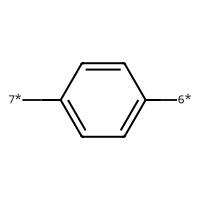
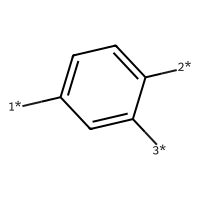
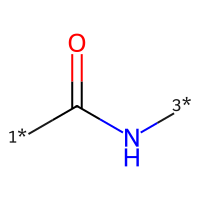
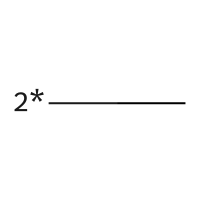
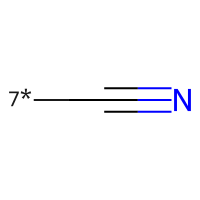
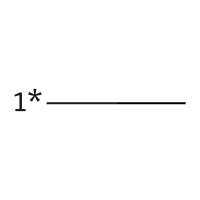
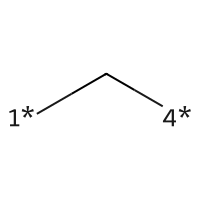
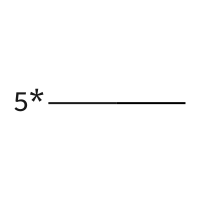
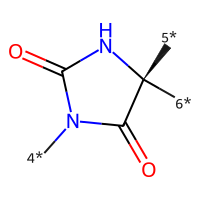

In [2]:
%time frag_frame = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')
frag_frame

CPU times: user 6.42 ms, sys: 375 µs, total: 6.79 ms
Wall time: 6.61 ms


,Smiles,xyz,Atoms,Labels,Molecule,count,numAttachments
0,*c1ccc(*)cc1,"[[-3.5967751015, 0.3077302347, -0.3127842213],...","[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[C, C, C, C, C, C, H, H, H, H]",,1,2
1,*c1ccc(*)c(*)c1,"[[5.9681947834, 1.1299306517, -0.7464804937], ...","[2, 3, 4, 5, 6, 7, 32, 33, 34]","[C, C, C, C, C, C, H, H, H]",,1,3
2,*NC(*)=O,"[[1.9468679815, -0.1096531685, 0.5482125474], ...","[9, 8, 10, 35]","[C, N, O, H]",,1,2
3,*C,"[[4.9471607037, -2.8791008972, 0.5208602322], ...","[28, 46, 47, 48]","[C, H, H, H]",,3,1
4,*C#N,"[[-7.5892175759, -1.0842080976, -0.4233090154]...","[26, 27]","[C, N]",,1,1
5,*C*,"[[0.7894540784, -0.6694717061, 1.3797296796], ...","[11, 36, 37]","[C, H, H]",,1,2
6,*N1C(=O)NC(*)(*)C1=O,"[[-0.4386326968, -0.0139950117, 1.0365203185],...","[12, 13, 14, 15, 16, 17, 18, 38]","[N, C, O, C, N, C, O, H]",,1,3

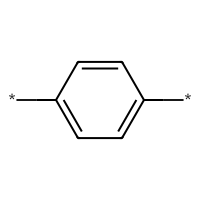
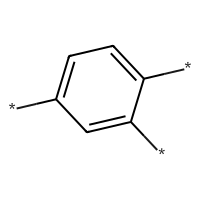
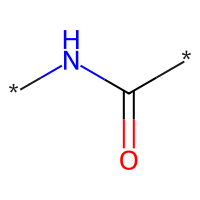
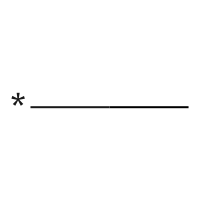
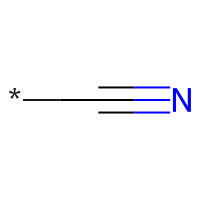
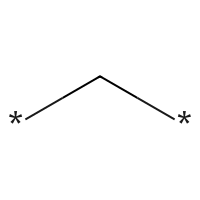
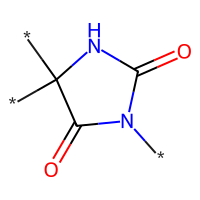

In [3]:
%time ff.count_uniques(frag_frame)

In [4]:
cml_txt = open('Data/cml_files.txt',"r")
cml_files = cml_txt.readlines()
cml_txt.close()
for i,cml in enumerate(cml_files):
  cml_files[i] = 'Data/' + cml_files[i].replace('\n','').replace('./','')
xyz_txt = open('Data/xyz_files.txt',"r")
xyz_files = xyz_txt.readlines()
xyz_txt.close()
for i,xyz in enumerate(xyz_files):
  xyz_files[i] = 'Data/' + xyz_files[i].replace('\n','').replace('./','')
#Produced errors - unsure why - says its related to charge not matching
#could be an error in the code that assigns bond orders
xyz_files.remove('Data/DUDE_13489372_cah2_decoys_C24H35N7O5_CIR.xyz')
cml_files.remove('Data/DUDE_13489372_cah2_decoys_C24H35N7O5_CIR.cml')
xyz_files.remove('Data/DUDE_16737368_kif11_decoys_C30H21N5O_CIR.xyz')
cml_files.remove('Data/DUDE_16737368_kif11_decoys_C30H21N5O_CIR.cml')
xyz_files.remove('Data/DUDE_16958170_hivpr_decoys_C22H19N6O8_CIR.xyz')
cml_files.remove('Data/DUDE_16958170_hivpr_decoys_C22H19N6O8_CIR.cml')
xyz_files.remove('Data/DUDE_33392010_mmp13_decoys_C24H28ClN5O6_CIR.xyz')
cml_files.remove('Data/DUDE_33392010_mmp13_decoys_C24H28ClN5O6_CIR.cml')
xyz_files.remove('Data/DUDE_63350531_mmp13_decoys_C27H25N3O6_CIR.xyz')
cml_files.remove('Data/DUDE_63350531_mmp13_decoys_C27H25N3O6_CIR.cml')
xyz_files.remove('Data/DUDE_63795253_lck_decoys_C29H30N4O3_CIR.xyz')
cml_files.remove('Data/DUDE_63795253_lck_decoys_C29H30N4O3_CIR.cml')

Data/DUDE_02395577_vgfr2_decoys_C26H28N6O4_CIR.xyz
Data/DUDE_02533854_braf_decoys_C28H23N3O3S2_CIR.xyz
Data/DUDE_03770066_mk14_decoys_C26H23FN4O4S_CIR.xyz


[14:21:10] Running LargestFragmentChooser
[14:21:10] Fragment: [C:1]([C:2]([C:3]([H:41])([H:42])[H:43])([O:4][C:5]([C:6]([C:7]([N:8]([C:9](=[O:10])[c:11]1[c:12]2[c:13]([n:14][c:15]3[c:16]([H:51])[c:17]([H:52])[c:18]([H:53])[c:19]([H:54])[c:20]3[n:21]2)[n:22](/[N:25]=[C:26](/[c:27]2[c:28]([H:58])[c:29]([H:59])[c:30]([C:33](=[O:34])[O:35][C:36]([H:62])([H:63])[H:64])[c:31]([H:60])[c:32]2[H:61])[H:57])[c:23]1[N:24]([H:55])[H:56])[H:50])([H:48])[H:49])([H:46])[H:47])([H:44])[H:45])[H:40])([H:37])([H:38])[H:39]
[14:21:10] New largest fragment: [C:1]([C:2]([C:3]([H:41])([H:42])[H:43])([O:4][C:5]([C:6]([C:7]([N:8]([C:9](=[O:10])[c:11]1[c:12]2[c:13]([n:14][c:15]3[c:16]([H:51])[c:17]([H:52])[c:18]([H:53])[c:19]([H:54])[c:20]3[n:21]2)[n:22](/[N:25]=[C:26](/[c:27]2[c:28]([H:58])[c:29]([H:59])[c:30]([C:33](=[O:34])[O:35][C:36]([H:62])([H:63])[H:64])[c:31]([H:60])[c:32]2[H:61])[H:57])[c:23]1[N:24]([H:55])[H:56])[H:50])([H:48])[H:49])([H:46])[H:47])([H:44])[H:45])[H:40])([H:37])([H:38])[H:39] (64)
[

Data/DUDE_04258917_pde5a_decoys_C26H21F4N3O3_CIR.xyz
Data/DUDE_06078538_src_decoys_C28H25ClN4O3_CIR.xyz
Data/DUDE_06245089_hivpr_decoys_C25H30N6O4S_CIR.xyz


[14:21:10] Running LargestFragmentChooser
[14:21:10] Fragment: [c:1]1([H:39])[c:2]([H:40])[c:3]([C:35]([F:36])([F:37])[F:38])[c:4]([H:41])[c:5]([H:42])[c:6]1[C:7](=[O:8])[N:9]([c:10]1[c:11]([H:44])[c:12]([H:45])[c:13]2[n:14]([c:15]1=[O:16])[C:17]([H:46])([H:47])[C@@:18]1([H:19])[C:20]([H:48])([H:49])[C@:21]2([H:22])[C:23]([H:50])([H:51])[N:24]([C:26](=[O:27])[c:28]2[c:29]([H:54])[c:30]([H:55])[c:31]([F:34])[c:32]([H:56])[c:33]2[H:57])[C:25]1([H:52])[H:53])[H:43]
[14:21:10] New largest fragment: [c:1]1([H:39])[c:2]([H:40])[c:3]([C:35]([F:36])([F:37])[F:38])[c:4]([H:41])[c:5]([H:42])[c:6]1[C:7](=[O:8])[N:9]([c:10]1[c:11]([H:44])[c:12]([H:45])[c:13]2[n:14]([c:15]1=[O:16])[C:17]([H:46])([H:47])[C@@:18]1([H:19])[C:20]([H:48])([H:49])[C@:21]2([H:22])[C:23]([H:50])([H:51])[N:24]([C:26](=[O:27])[c:28]2[c:29]([H:54])[c:30]([H:55])[c:31]([F:34])[c:32]([H:56])[c:33]2[H:57])[C:25]1([H:52])[H:53])[H:43] (57)
[14:21:10] Running LargestFragmentChooser
[14:21:10] Fragment: [C:1]([C:2]([N:3]([C:4]([C:5

Data/DUDE_06442523_igf1r_decoys_C28H39N6O2_CIR.xyz
Data/DUDE_08771598_fa7_decoys_C31H32N3O2_CIR.xyz
Data/DUDE_08789394_thrb_decoys_C25H24ClN4O6_CIR.xyz
Data/DUDE_08791069_mapk2_decoys_C26H27N4O6_CIR.xyz


[14:21:10] Running LargestFragmentChooser
[14:21:10] Fragment: [C:1]([c:2]1[c:3]([H:44])[c:4]([H:45])[c:5]2[c:6]([H:46])[c:7]([C@:15]([H:16])([c:17]3[n:18][n:19][n:20][n:21]3[C:22]([C@@:23]3([H:24])[C:25]([H:52])([H:53])[C:26]([H:54])([H:55])[C:27]([H:56])([H:57])[O:28]3)([H:50])[H:51])[N@+:29]3([H:30])[C:31]([H:58])([H:59])[C:32]([H:60])([H:61])[C:33]([H:62])([H:63])[C:34]4([C:35]3([H:64])[H:65])[C:36]([H:66])([H:67])[C:37]([H:68])([H:69])[C:38]([H:70])([H:71])[C:39]([H:72])([H:73])[C:40]4([H:74])[H:75])[c:8](=[O:9])[n:10]([H:11])[c:12]2[c:13]1[C:14]([H:47])([H:48])[H:49])([H:41])([H:42])[H:43]
[14:21:10] New largest fragment: [C:1]([c:2]1[c:3]([H:44])[c:4]([H:45])[c:5]2[c:6]([H:46])[c:7]([C@:15]([H:16])([c:17]3[n:18][n:19][n:20][n:21]3[C:22]([C@@:23]3([H:24])[C:25]([H:52])([H:53])[C:26]([H:54])([H:55])[C:27]([H:56])([H:57])[O:28]3)([H:50])[H:51])[N@+:29]3([H:30])[C:31]([H:58])([H:59])[C:32]([H:60])([H:61])[C:33]([H:62])([H:63])[C:34]4([C:35]3([H:64])[H:65])[C:36]([H:66])([H:67])[C:37

Data/DUDE_09008554_ppard_decoys_C28H22FN2O4S_CIR.xyz
Data/DUDE_09041410_ital_decoys_C29H25N3O2S2_CIR.xyz
Data/DUDE_09271201_fnta_decoys_C29H39N2O5_CIR.xyz


[14:21:11] Running LargestFragmentChooser
[14:21:11] Fragment: [C:1]([C:2]([N+:3]([H:4])([C:5]([C:6]([H:46])([H:47])[H:48])([H:44])[H:45])[C:7]([C:8]([N:9]1[C@:10]([H:11])([c:29]2[c:30]([H:65])[c:31]([H:66])[c:32]([O:35][C:36]([C:37]([H:70])([H:71])[H:72])([C:38]([H:73])([H:74])[H:75])[H:69])[c:33]([H:67])[c:34]2[H:68])/[C:12](=[C:13](/[c:14]2[c:15]([H:53])[c:16]([H:54])[c:17]([O:20][C:21]([C:22]([H:58])([H:59])[H:60])([C:23]([H:61])([H:62])[H:63])[H:57])[c:18]([H:55])[c:19]2[H:56])[O:24][H:64])[C:25](=[O:26])[C:27]1=[O:28])([H:51])[H:52])([H:49])[H:50])([H:42])[H:43])([H:39])([H:40])[H:41]
[14:21:11] New largest fragment: [C:1]([C:2]([N+:3]([H:4])([C:5]([C:6]([H:46])([H:47])[H:48])([H:44])[H:45])[C:7]([C:8]([N:9]1[C@:10]([H:11])([c:29]2[c:30]([H:65])[c:31]([H:66])[c:32]([O:35][C:36]([C:37]([H:70])([H:71])[H:72])([C:38]([H:73])([H:74])[H:75])[H:69])[c:33]([H:67])[c:34]2[H:68])/[C:12](=[C:13](/[c:14]2[c:15]([H:53])[c:16]([H:54])[c:17]([O:20][C:21]([C:22]([H:58])([H:59])[H:60])([C:23]([H

Data/DUDE_09374263_pparg_decoys_C28H20FN2O4S_CIR.xyz
Data/DUDE_09374948_ppara_decoys_C26H28FN2O6S_CIR.xyz
Data/DUDE_09407405_ada17_decoys_C25H29N7O4_CIR.xyz


[14:21:11] Running LargestFragmentChooser
[14:21:11] Fragment: [C:1]([c:2]1[c:3]([C:21]([C:22]([C:23](=[O:24])[N:25]([c:26]2[c:27]([H:60])[c:28]([H:61])[c:29]([H:62])[c:30](-[c:32]3[c:33]([H:64])[c:34]([H:65])[n:35][o:36]3)[c:31]2[H:63])[H:59])([H:57])[H:58])([H:55])[H:56])[c:4]([C:20]([H:52])([H:53])[H:54])[n:5]2[c:6]([n:7]1)[n:8][c:9]([C:11]([N:12]([C:13](=[O:14])[O:15][C:16]([C:17]([H:43])([H:44])[H:45])([C:18]([H:46])([H:47])[H:48])[C:19]([H:49])([H:50])[H:51])[H:42])([H:40])[H:41])[n:10]2)([H:37])([H:38])[H:39]
[14:21:11] New largest fragment: [C:1]([c:2]1[c:3]([C:21]([C:22]([C:23](=[O:24])[N:25]([c:26]2[c:27]([H:60])[c:28]([H:61])[c:29]([H:62])[c:30](-[c:32]3[c:33]([H:64])[c:34]([H:65])[n:35][o:36]3)[c:31]2[H:63])[H:59])([H:57])[H:58])([H:55])[H:56])[c:4]([C:20]([H:52])([H:53])[H:54])[n:5]2[c:6]([n:7]1)[n:8][c:9]([C:11]([N:12]([C:13](=[O:14])[O:15][C:16]([C:17]([H:43])([H:44])[H:45])([C:18]([H:46])([H:47])[H:48])[C:19]([H:49])([H:50])[H:51])[H:42])([H:40])[H:41])[n:10]2)([H:37])(

Data/DUDE_09425035_egfr_decoys_C28H33N2O6_CIR.xyz
Data/DUDE_10050109_vgfr2_decoys_C26H34N7O3_CIR.xyz
Data/DUDE_12020007_src_decoys_C28H32N3O5_CIR.xyz


[14:21:11] Running LargestFragmentChooser
[14:21:11] Fragment: [C:1]([C:2]([C@@:3]1([C@@:22]2([H:53])[C:23]([H:54])([H:55])[C:24]([H:56])([H:57])[N@+:25]([H:26])([C:29]([c:30]3[c:31]([H:64])[c:32]4[c:33]([H:65])[c:34]([H:66])[c:35]([H:67])[c:36]([H:68])[c:37]4[o:38]3)([H:62])[H:63])[C:27]([H:58])([H:59])[C:28]2([H:60])[H:61])[C:4](=[O:5])[N:6]([C:10]([C@:11]2([H:12])[C:13]([H:47])([H:48])[O:14][c:15]3[c:16]([H:49])[c:17]([H:50])[c:18]([H:51])[c:19]([H:52])[c:20]3[O:21]2)([H:45])[H:46])[C:7](=[O:8])[N:9]1[H:44])([H:42])[H:43])([H:39])([H:40])[H:41]
[14:21:11] New largest fragment: [C:1]([C:2]([C@@:3]1([C@@:22]2([H:53])[C:23]([H:54])([H:55])[C:24]([H:56])([H:57])[N@+:25]([H:26])([C:29]([c:30]3[c:31]([H:64])[c:32]4[c:33]([H:65])[c:34]([H:66])[c:35]([H:67])[c:36]([H:68])[c:37]4[o:38]3)([H:62])[H:63])[C:27]([H:58])([H:59])[C:28]2([H:60])[H:61])[C:4](=[O:5])[N:6]([C:10]([C@:11]2([H:12])[C:13]([H:47])([H:48])[O:14][c:15]3[c:16]([H:49])[c:17]([H:50])[c:18]([H:51])[c:19]([H:52])[c:20]3[O:21]2)(

Data/DUDE_12020012_abl1_decoys_C28H32N3O5_CIR.xyz
Data/DUDE_12250136_cdk2_decoys_C28H26N4O3S_CIR.xyz
Data/DUDE_12376684_bace1_decoys_C28H19ClN4O3_CIR.xyz


[14:21:11] Running LargestFragmentChooser
[14:21:11] Fragment: [c:1]1([H:37])[c:2]([H:38])[c:3]([H:39])[c:4]([N:7]2[C:8]3=[C:9]([C:10](=[O:11])[O:12][C:13]3([H:42])[H:43])[C@@:14]3([c:15]4[c:16]([H:44])[c:17]([H:45])[c:18]([H:46])[c:19]([H:47])[c:20]4[N:21]([C:24]([c:25]4[c:26]([H:50])[c:27]([H:51])[c:28]([H:52])[c:29]([H:53])[c:30]4[Cl:31])([H:48])[H:49])[C:22]3=[O:23])[C:32]([C:35]#[N:36])=[C:33]2[N:34]([H:54])[H:55])[c:5]([H:40])[c:6]1[H:41]
[14:21:11] New largest fragment: [c:1]1([H:37])[c:2]([H:38])[c:3]([H:39])[c:4]([N:7]2[C:8]3=[C:9]([C:10](=[O:11])[O:12][C:13]3([H:42])[H:43])[C@@:14]3([c:15]4[c:16]([H:44])[c:17]([H:45])[c:18]([H:46])[c:19]([H:47])[c:20]4[N:21]([C:24]([c:25]4[c:26]([H:50])[c:27]([H:51])[c:28]([H:52])[c:29]([H:53])[c:30]4[Cl:31])([H:48])[H:49])[C:22]3=[O:23])[C:32]([C:35]#[N:36])=[C:33]2[N:34]([H:54])[H:55])[c:5]([H:40])[c:6]1[H:41] (55)
[14:21:11] Running LargestFragmentChooser
[14:21:11] Fragment: [C:1]([c:2]1[c:3]([H:42])[c:4]([H:43])[c:5](-[c:8]2[n:9][n:10][n

Data/DUDE_12704156_casp3_decoys_C26H32N6O3S_CIR.xyz
Data/DUDE_12714763_kpcb_decoys_C26H31N5O4S_CIR.xyz
Data/DUDE_13495872_vgfr2_decoys_C29H37N6O_CIR.xyz


[14:21:12] Running LargestFragmentChooser
[14:21:12] Fragment: [C:1]([C:2]([C@:3]([H:4])([c:5]1[n:6][n:7][n:8][n:9]1[C:10]1([H:45])[C:11]([H:46])([H:47])[C:12]([H:48])([H:49])[C:13]([H:50])([H:51])[C:14]1([H:52])[H:53])[N@@+:15]([H:16])([C:17]([C:18]([c:19]1[c:20]([H:58])[c:21]([H:59])[c:22]([H:60])[c:23]([H:61])[c:24]1[C:25]([H:62])([H:63])[H:64])([H:56])[H:57])([H:54])[H:55])[C:26]([c:27]1[c:28]([H:67])[c:29]2[c:30]([H:68])[c:31]([H:69])[c:32]([H:70])[c:33]([C:39]([H:71])([H:72])[H:73])[c:34]2[n:35]([H:36])[c:37]1=[O:38])([H:65])[H:66])([H:43])[H:44])([H:40])([H:41])[H:42]
[14:21:12] New largest fragment: [C:1]([C:2]([C@:3]([H:4])([c:5]1[n:6][n:7][n:8][n:9]1[C:10]1([H:45])[C:11]([H:46])([H:47])[C:12]([H:48])([H:49])[C:13]([H:50])([H:51])[C:14]1([H:52])[H:53])[N@@+:15]([H:16])([C:17]([C:18]([c:19]1[c:20]([H:58])[c:21]([H:59])[c:22]([H:60])[c:23]([H:61])[c:24]1[C:25]([H:62])([H:63])[H:64])([H:56])[H:57])([H:54])[H:55])[C:26]([c:27]1[c:28]([H:67])[c:29]2[c:30]([H:68])[c:31]([H:69])[c:32

Data/DUDE_14129583_mmp13_decoys_C24H18F4N6OS_CIR.xyz
Data/DUDE_14684645_thrb_decoys_C23H22O13_CIR.xyz
Data/DUDE_15317677_try1_decoys_C27H29N3O6_CIR.xyz


[14:21:12] Running LargestFragmentChooser
[14:21:12] Fragment: [C:1]([C:2](=[O:3])[O:4][C:5]([C@:6]1([H:7])[C@@:8]([H:9])([O:41][H:58])[C@:10]([H:11])([O:40][H:57])[C@:12]([H:13])([O:39][H:56])[C@:14]([H:15])([O:17][c:18]2[c:19](=[O:20])[c:21]3[c:22]([O:38][H:55])[c:23]([H:47])[c:24]([O:37][H:54])[c:25]([H:48])[c:26]3[o:27][c:28]2-[c:29]2[c:30]([H:49])[c:31]([H:50])[c:32]([O:36][H:53])[c:33]([O:35][H:52])[c:34]2[H:51])[O:16]1)([H:45])[H:46])([H:42])([H:43])[H:44]
[14:21:12] New largest fragment: [C:1]([C:2](=[O:3])[O:4][C:5]([C@:6]1([H:7])[C@@:8]([H:9])([O:41][H:58])[C@:10]([H:11])([O:40][H:57])[C@:12]([H:13])([O:39][H:56])[C@:14]([H:15])([O:17][c:18]2[c:19](=[O:20])[c:21]3[c:22]([O:38][H:55])[c:23]([H:47])[c:24]([O:37][H:54])[c:25]([H:48])[c:26]3[o:27][c:28]2-[c:29]2[c:30]([H:49])[c:31]([H:50])[c:32]([O:36][H:53])[c:33]([O:35][H:52])[c:34]2[H:51])[O:16]1)([H:45])[H:46])([H:42])([H:43])[H:44] (58)
[14:21:12] Running LargestFragmentChooser
[14:21:12] Fragment: [C:1]([c:2]1[c:3]([H:42])[

Data/DUDE_19074336_src_decoys_C29H32N5O2_CIR.xyz
Data/DUDE_20288805_lkha4_decoys_C29H27FN4O2_CIR.xyz


[14:21:12] Running LargestFragmentChooser
[14:21:12] Fragment: [C:1]([c:2]1[c:3]([H:41])[c:4]([H:42])[c:5]2[c:6]([c:7]1[H:43])[c:8]([C:12]([C:13]([N:14](/[C:15](=[C:16]1/[C:17]([c:29]3[c:30]([H:54])[c:31]([H:55])[c:32]([O:35][C:36]([H:58])([H:59])[H:60])[c:33]([H:56])[c:34]3[H:57])=[N:18][N:19]([c:22]3[c:23]([H:50])[c:24]([H:51])[c:25]([F:28])[c:26]([H:52])[c:27]3[H:53])[C:20]1=[O:21])[C:37]([H:61])([H:62])[H:63])[H:49])([H:47])[H:48])([H:45])[H:46])[c:9]([H:44])[n:10]2[H:11])([H:38])([H:39])[H:40]
[14:21:12] New largest fragment: [C:1]([c:2]1[c:3]([H:41])[c:4]([H:42])[c:5]2[c:6]([c:7]1[H:43])[c:8]([C:12]([C:13]([N:14](/[C:15](=[C:16]1/[C:17]([c:29]3[c:30]([H:54])[c:31]([H:55])[c:32]([O:35][C:36]([H:58])([H:59])[H:60])[c:33]([H:56])[c:34]3[H:57])=[N:18][N:19]([c:22]3[c:23]([H:50])[c:24]([H:51])[c:25]([F:28])[c:26]([H:52])[c:27]3[H:53])[C:20]1=[O:21])[C:37]([H:61])([H:62])[H:63])[H:49])([H:47])[H:48])([H:45])[H:46])[c:9]([H:44])[n:10]2[H:11])([H:38])([H:39])[H:40] (63)
[14:21:12] Runnin

Data/DUDE_20325311_cp2c9_decoys_C27H28N4O3S2_CIR.xyz
Data/DUDE_20644861_cdk2_decoys_C25H31N5O4S2_CIR.xyz
Data/DUDE_21336104_fa10_decoys_C27H39N5O4_CIR.xyz


[14:21:12] Running LargestFragmentChooser
[14:21:12] Fragment: [C:1]([C:2]([C@@:3]([H:4])([C:5](=[O:6])[N:7]([C:8]([C@@:9]1([H:10])[C:11]([H:47])([H:48])[C:12]([H:49])([H:50])[C:13]([H:51])([H:52])[O:14]1)([H:45])[H:46])[H:44])/[S+:15]=[c:16]1\[n:17][c:18]2[c:19]([c:20]([C:34]([H:63])([H:64])[H:65])[c:21]([C:23](=[O:24])[N:25]([c:26]3[c:27]([H:54])[c:28]([H:55])[c:29]([C:33]([H:60])([H:61])[H:62])[c:30]([H:56])[c:31]3[C:32]([H:57])([H:58])[H:59])[H:53])[s:22]2)[c:35]([O-:36])[n:37]1[N:38]([H:66])[H:67])([H:42])[H:43])([H:39])([H:40])[H:41]
[14:21:12] New largest fragment: [C:1]([C:2]([C@@:3]([H:4])([C:5](=[O:6])[N:7]([C:8]([C@@:9]1([H:10])[C:11]([H:47])([H:48])[C:12]([H:49])([H:50])[C:13]([H:51])([H:52])[O:14]1)([H:45])[H:46])[H:44])/[S+:15]=[c:16]1\[n:17][c:18]2[c:19]([c:20]([C:34]([H:63])([H:64])[H:65])[c:21]([C:23](=[O:24])[N:25]([c:26]3[c:27]([H:54])[c:28]([H:55])[c:29]([C:33]([H:60])([H:61])[H:62])[c:30]([H:56])[c:31]3[C:32]([H:57])([H:58])[H:59])[H:53])[s:22]2)[c:35]([O-:36])[n:3

Data/DUDE_22060943_ada17_decoys_C24H20ClFN3O7_CIR.xyz
Data/DUDE_22433133_reni_decoys_C25H28N4O7_CIR.xyz
Data/DUDE_23362878_akt2_decoys_C30H37FN3O2_CIR.xyz


[14:21:13] Running LargestFragmentChooser
[14:21:13] Fragment: [C:1]([C:2]([N:3]([c:4]1[c:5]([N:20]([H:50])[H:51])[n:6]([C:13]([c:14]2[c:15]([H:45])[c:16]([H:46])[c:17]([H:47])[c:18]([H:48])[c:19]2[H:49])([H:43])[H:44])[c:7](=[O:8])[n:9]([H:10])[c:11]1=[O:12])[C:21](=[O:22])[C:23]([O:24][C:25](=[O:26])[C:27]([O:28][c:29]1[c:30]([H:56])[c:31]([H:57])[c:32]([H:58])[c:33]([H:59])[c:34]1[O:35][C:36]([C:37]([H:62])([H:63])[H:64])([H:60])[H:61])([H:54])[H:55])([H:52])[H:53])([H:41])[H:42])([H:38])([H:39])[H:40]
[14:21:13] New largest fragment: [C:1]([C:2]([N:3]([c:4]1[c:5]([N:20]([H:50])[H:51])[n:6]([C:13]([c:14]2[c:15]([H:45])[c:16]([H:46])[c:17]([H:47])[c:18]([H:48])[c:19]2[H:49])([H:43])[H:44])[c:7](=[O:8])[n:9]([H:10])[c:11]1=[O:12])[C:21](=[O:22])[C:23]([O:24][C:25](=[O:26])[C:27]([O:28][c:29]1[c:30]([H:56])[c:31]([H:57])[c:32]([H:58])[c:33]([H:59])[c:34]1[O:35][C:36]([C:37]([H:62])([H:63])[H:64])([H:60])[H:61])([H:54])[H:55])([H:52])[H:53])([H:41])[H:42])([H:38])([H:39])[H:40] (64)
[14

Data/DUDE_27021091_mmp13_decoys_C28H22N3O3S2_CIR.xyz
Data/DUDE_28707564_gcr_decoys_C32H35N4_CIR.xyz


[14:21:13] Running LargestFragmentChooser
[14:21:13] Fragment: [C:1]([c:2]1[c:3]([H:41])[c:4]([H:42])[c:5]([C@@:8]2([H:9])/[C:10](=[C:29](/[O-:30])[c:31]3[c:32]([H:52])[c:33]([H:53])[c:34]([C:37]([H:56])([H:57])[H:58])[c:35]([H:54])[c:36]3[H:55])[C:11](=[O:28])[C:12](=[O:13])[N:14]2[c:15]2[n:16][n:17][c:18]([S:20][C:21]([c:22]3[c:23]([H:47])[c:24]([H:48])[c:25]([H:49])[c:26]([H:50])[c:27]3[H:51])([H:45])[H:46])[s:19]2)[c:6]([H:43])[c:7]1[H:44])([H:38])([H:39])[H:40]
[14:21:13] New largest fragment: [C:1]([c:2]1[c:3]([H:41])[c:4]([H:42])[c:5]([C@@:8]2([H:9])/[C:10](=[C:29](/[O-:30])[c:31]3[c:32]([H:52])[c:33]([H:53])[c:34]([C:37]([H:56])([H:57])[H:58])[c:35]([H:54])[c:36]3[H:55])[C:11](=[O:28])[C:12](=[O:13])[N:14]2[c:15]2[n:16][n:17][c:18]([S:20][C:21]([c:22]3[c:23]([H:47])[c:24]([H:48])[c:25]([H:49])[c:26]([H:50])[c:27]3[H:51])([H:45])[H:46])[s:19]2)[c:6]([H:43])[c:7]1[H:44])([H:38])([H:39])[H:40] (58)
[14:21:13] Running LargestFragmentChooser
[14:21:13] Fragment: [C:1]([c:2]1[c:3]([H

Data/DUDE_33671049_pa2ga_decoys_C33H56O2S_CIR.xyz
Data/DUDE_33871653_fa10_decoys_C28H22N3O5_CIR.xyz
Data/DUDE_33933379_mmp13_decoys_C26H31ClN5O4_CIR.xyz


[14:21:13] Running LargestFragmentChooser
[14:21:13] Fragment: [C:1]([C:2]([C:3]([C:4]([C:5]([O:6][C:7](=[O:8])[S:9][C@:10]1([H:11])[C:12]([H:54])([H:55])[C:13]([H:56])([H:57])[C@:14]2([C:42]([H:90])([H:91])[H:92])[C@:15]3([H:16])[C:17]([H:58])([H:59])[C:18]([H:60])([H:61])[C@:19]4([C:41]([H:87])([H:88])[H:89])[C:20]([H:62])([H:63])[C@:21]([H:22])([C@@:32]([H:33])([C:34]([H:71])([H:72])[H:73])[C:35]([C:36]([C:37]([C:38]([C:39]([H:81])([H:82])[H:83])([C:40]([H:84])([H:85])[H:86])[H:80])([H:78])[H:79])([H:76])[H:77])([H:74])[H:75])[C:23]([H:64])([H:65])[C@:24]4([H:25])[C@:26]3([H:27])[C:28]([H:66])([H:67])[C:29]([H:68])=[C:30]2[C:31]1([H:69])[H:70])([H:52])[H:53])([H:50])[H:51])([H:48])[H:49])([H:46])[H:47])([H:43])([H:44])[H:45]
[14:21:13] New largest fragment: [C:1]([C:2]([C:3]([C:4]([C:5]([O:6][C:7](=[O:8])[S:9][C@:10]1([H:11])[C:12]([H:54])([H:55])[C:13]([H:56])([H:57])[C@:14]2([C:42]([H:90])([H:91])[H:92])[C@:15]3([H:16])[C:17]([H:58])([H:59])[C:18]([H:60])([H:61])[C@:19]4([C:41]([H

Data/DUDE_34748678_ada17_decoys_C26H41N6O3S_CIR.xyz
Data/DUDE_34879883_hivpr_decoys_C24H25F3N4O4S_CIR.xyz
Data/DUDE_34922740_hivpr_decoys_C28H30N3O4S_CIR.xyz


[14:21:13] Running LargestFragmentChooser
[14:21:13] Fragment: [C:1]([C:2]([N:3]([C:4]([C:5]([H:45])([H:46])[H:47])([H:43])[H:44])[C:6](=[O:7])[C:8]([N+:9]1([H:10])[C:11]([H:50])([H:51])[C:12]([H:52])([H:53])[N:13]([c:16]2[n:17][c:18]3[s+:22][c:21]([C:23]([H:58])([H:59])[H:60])[c:20]([C:24]([H:61])([H:62])[H:63])[c:19]-3[c:25]([O-:26])[n:27]2[C:28]([C:29](=[O:30])[N:31]([C:32]2([H:67])[C:33]([H:68])([H:69])[C:34]([H:70])([H:71])[C:35]([H:72])([H:73])[C:36]([H:74])([H:75])[C:37]2([H:76])[H:77])[H:66])([H:64])[H:65])[C:14]([H:54])([H:55])[C:15]1([H:56])[H:57])([H:48])[H:49])([H:41])[H:42])([H:38])([H:39])[H:40]
[14:21:13] New largest fragment: [C:1]([C:2]([N:3]([C:4]([C:5]([H:45])([H:46])[H:47])([H:43])[H:44])[C:6](=[O:7])[C:8]([N+:9]1([H:10])[C:11]([H:50])([H:51])[C:12]([H:52])([H:53])[N:13]([c:16]2[n:17][c:18]3[s+:22][c:21]([C:23]([H:58])([H:59])[H:60])[c:20]([C:24]([H:61])([H:62])[H:63])[c:19]-3[c:25]([O-:26])[n:27]2[C:28]([C:29](=[O:30])[N:31]([C:32]2([H:67])[C:33]([H:68])([H:69])[C:

Data/DUDE_35454658_tryb1_decoys_C27H46O9_CIR.xyz
Data/DUDE_35566923_mmp13_decoys_C27H35N2O6S_CIR.xyz


[14:21:14] Running LargestFragmentChooser
[14:21:14] Fragment: [C:1]([C:2]([C:3]([C:4]([C:5]([O:6][c:7]1[c:8]([H:49])[c:9]([H:50])[c:10]([C@@:16]2([H:17])/[C:18](=[C:29](/[O-:30])[c:31]3[c:32]([C:37]([H:69])([H:70])[H:71])[n:33][c:34]([C:36]([H:66])([H:67])[H:68])[s:35]3)[C:19](=[O:28])[C:20](=[O:21])[N:22]2[C:23]([C:24]([C:25]([O:26][C:27]([H:63])([H:64])[H:65])([H:61])[H:62])([H:59])[H:60])([H:57])[H:58])[c:11]([H:51])[c:12]1[O:13][C:14]([C:15]([H:54])([H:55])[H:56])([H:52])[H:53])([H:47])[H:48])([H:45])[H:46])([H:43])[H:44])([H:41])[H:42])([H:38])([H:39])[H:40]
[14:21:14] New largest fragment: [C:1]([C:2]([C:3]([C:4]([C:5]([O:6][c:7]1[c:8]([H:49])[c:9]([H:50])[c:10]([C@@:16]2([H:17])/[C:18](=[C:29](/[O-:30])[c:31]3[c:32]([C:37]([H:69])([H:70])[H:71])[n:33][c:34]([C:36]([H:66])([H:67])[H:68])[s:35]3)[C:19](=[O:28])[C:20](=[O:21])[N:22]2[C:23]([C:24]([C:25]([O:26][C:27]([H:63])([H:64])[H:65])([H:61])[H:62])([H:59])[H:60])([H:57])[H:58])[c:11]([H:51])[c:12]1[O:13][C:14]([C:15]([H:54])(

Data/DUDE_35646610_akt2_decoys_C28H41N4O4_CIR.xyz
Data/DUDE_35724933_braf_decoys_C28H37N5O2S_CIR.xyz
Data/DUDE_35777636_reni_decoys_C30H35FN3O2_CIR.xyz


[14:21:14] Running LargestFragmentChooser
[14:21:14] Fragment: [C:1]([C:2]([C@@:3]([H:4])([C:5]([H:44])([H:45])[H:46])[C@@:6]([H:7])([C:8](=[O:9])[N:10]([c:11]1[n:12][n:13][c:14](-[c:16]2[c:17]([H:48])[c:18]([H:49])[c:19]([C:22]([H:52])([H:53])[H:54])[c:20]([H:50])[c:21]2[H:51])[s:15]1)[H:47])[N:23]([C:24](=[O:25])[N:26]([c:27]1[c:28]([C:36]([C:37]([H:68])([H:69])[H:70])([C:38]([H:71])([H:72])[H:73])[H:67])[c:29]([H:57])[c:30]([H:58])[c:31]([H:59])[c:32]1[C:33]([C:34]([H:61])([H:62])[H:63])([C:35]([H:64])([H:65])[H:66])[H:60])[H:56])[H:55])([H:42])[H:43])([H:39])([H:40])[H:41]
[14:21:14] New largest fragment: [C:1]([C:2]([C@@:3]([H:4])([C:5]([H:44])([H:45])[H:46])[C@@:6]([H:7])([C:8](=[O:9])[N:10]([c:11]1[n:12][n:13][c:14](-[c:16]2[c:17]([H:48])[c:18]([H:49])[c:19]([C:22]([H:52])([H:53])[H:54])[c:20]([H:50])[c:21]2[H:51])[s:15]1)[H:47])[N:23]([C:24](=[O:25])[N:26]([c:27]1[c:28]([C:36]([C:37]([H:68])([H:69])[H:70])([C:38]([H:71])([H:72])[H:73])[H:67])[c:29]([H:57])[c:30]([H:58])[c:31]([

Data/DUDE_35915516_esr1_decoys_C29H31F3N3O_CIR.xyz
Data/DUDE_35947879_jak2_decoys_C26H27ClN4O4S_CIR.xyz


[14:21:14] Running LargestFragmentChooser
[14:21:14] Fragment: [c:1]1([H:38])[c:2]([H:39])[c:3]([C:6](=[O:7])[N:8]([C:9]([C:10]([N:11]2[C:12]([H:45])([H:46])[C:13]([H:47])([H:48])[O:14][C:15]([H:49])([H:50])[C:16]2([H:51])[H:52])([H:43])[H:44])([H:41])[H:42])[C:17]([C:18](=[O:19])[N:20]2[C@:21]([H:22])([c:31]3[c:32]([H:60])[c:33]([H:61])[c:34]([Cl:37])[c:35]([H:62])[c:36]3[H:63])[C:23]([H:55])([H:56])[C:24]([c:26]3[c:27]([H:57])[c:28]([H:58])[c:29]([H:59])[s:30]3)=[N:25]2)([H:53])[H:54])[o:4][c:5]1[H:40]
[14:21:14] New largest fragment: [c:1]1([H:38])[c:2]([H:39])[c:3]([C:6](=[O:7])[N:8]([C:9]([C:10]([N:11]2[C:12]([H:45])([H:46])[C:13]([H:47])([H:48])[O:14][C:15]([H:49])([H:50])[C:16]2([H:51])[H:52])([H:43])[H:44])([H:41])[H:42])[C:17]([C:18](=[O:19])[N:20]2[C@:21]([H:22])([c:31]3[c:32]([H:60])[c:33]([H:61])[c:34]([Cl:37])[c:35]([H:62])[c:36]3[H:63])[C:23]([H:55])([H:56])[C:24]([c:26]3[c:27]([H:57])[c:28]([H:58])[c:29]([H:59])[s:30]3)=[N:25]2)([H:53])[H:54])[o:4][c:5]1[H:40] (63)
[14:2

Data/DUDE_35957250_gcr_decoys_C28H26FN3O3S_CIR.xyz
Data/DUDE_36053244_ppara_decoys_C28H29N4O3S_CIR.xyz
Data/DUDE_36058783_hivpr_decoys_C28H27FN3O3S_CIR.xyz


[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:15] Running LargestFragmentChooser
[14:21:15] Fragment: [C:1]([c:2]1[c:3]([H:41])[c:4]([H:42])[c:5]([C@:9]2([H:10])/[C:11](=[C:32](/[O-:33])[O:34][C:35]([C:36](=[C:37]([H:62])[H:63])[H:61])(

Data/DUDE_36061323_ppard_decoys_C26H32ClN4O4S_CIR.xyz
Data/DUDE_36316357_reni_decoys_C29H40N3O4_CIR.xyz


[14:21:15] Running LargestFragmentChooser
[14:21:15] Fragment: [C:1]([C:2]1=[N:11][c:10]2[n:6]([c:7](/[C:12](=[C:13](/[N:14]([C:15]([C:16]([N:17]3[C:18]([H:48])([H:49])[C:19]([H:50])([H:51])[O:20][C:21]([H:52])([H:53])[C:22]3([H:54])[H:55])([H:46])[H:47])([H:44])[H:45])[H:43])[O-:23])[H:42])[c:8]([H:41])[s+:9]2)[C@:4]([H:5])([c:24]2[c:25]([H:56])[c:26]([H:57])[c:27]([Cl:30])[c:28]([H:58])[c:29]2[H:59])/[C:3]1=[C:31](/[O-:32])[O:33][C:34]([C:35]([H:60])([H:61])[H:62])([C:36]([H:63])([H:64])[H:65])[C:37]([H:66])([H:67])[H:68])([H:38])([H:39])[H:40]
[14:21:15] New largest fragment: [C:1]([C:2]1=[N:11][c:10]2[n:6]([c:7](/[C:12](=[C:13](/[N:14]([C:15]([C:16]([N:17]3[C:18]([H:48])([H:49])[C:19]([H:50])([H:51])[O:20][C:21]([H:52])([H:53])[C:22]3([H:54])[H:55])([H:46])[H:47])([H:44])[H:45])[H:43])[O-:23])[H:42])[c:8]([H:41])[s+:9]2)[C@:4]([H:5])([c:24]2[c:25]([H:56])[c:26]([H:57])[c:27]([Cl:30])[c:28]([H:58])[c:29]2[H:59])/[C:3]1=[C:31](/[O-:32])[O:33][C:34]([C:35]([H:60])([H:61])[H:62])([C:36

Data/DUDE_36346750_akt2_decoys_C29H32F2N3O2_CIR.xyz
Data/DUDE_36495973_pa2ga_decoys_C28H38N2O5S_CIR.xyz


[14:21:15] Running LargestFragmentChooser
[14:21:15] Fragment: [C:1]([C:2]([C:3]([N@@+:4]([H:5])([C:6]([c:7]1[c:8]([C:27]([H:56])([H:57])[H:58])[n:9][n:10](-[c:20]2[c:21]([H:52])[c:22]([H:53])[c:23]([F:26])[c:24]([H:54])[c:25]2[H:55])[c:11]1[O:12][c:13]1[c:14]([H:48])[c:15]([H:49])[c:16]([F:19])[c:17]([H:50])[c:18]1[H:51])([H:46])[H:47])[C:28]([C@:29]([H:30])([C:31]([c:32]1[c:33]([H:63])[c:34]([H:64])[c:35]([H:65])[c:36]([H:66])[c:37]1[H:67])([H:61])[H:62])[O:38][H:68])([H:59])[H:60])([H:44])[H:45])([H:42])[H:43])([H:39])([H:40])[H:41]
[14:21:15] New largest fragment: [C:1]([C:2]([C:3]([N@@+:4]([H:5])([C:6]([c:7]1[c:8]([C:27]([H:56])([H:57])[H:58])[n:9][n:10](-[c:20]2[c:21]([H:52])[c:22]([H:53])[c:23]([F:26])[c:24]([H:54])[c:25]2[H:55])[c:11]1[O:12][c:13]1[c:14]([H:48])[c:15]([H:49])[c:16]([F:19])[c:17]([H:50])[c:18]1[H:51])([H:46])[H:47])[C:28]([C@:29]([H:30])([C:31]([c:32]1[c:33]([H:63])[c:34]([H:64])[c:35]([H:65])[c:36]([H:66])[c:37]1[H:67])([H:61])[H:62])[O:38][H:68])([H:59])[H:60]

Data/DUDE_36513875_adrb1_decoys_C27H38N3O6_CIR.xyz
Data/DUDE_36597790_ada17_decoys_C26H28N2O7S_CIR.xyz


[14:21:15] Running LargestFragmentChooser
[14:21:15] Fragment: [C:1]([C:2]([C:3]([C:4]([C:5]([C:6]([N:7]([C@:8]([H:9])([c:10]1[c:11]([H:51])[c:12]([H:52])[c:13]([H:53])[o:14]1)[C:15](=[O:16])[N:17]([C:18]([C:19]([H:55])([H:56])[H:57])([C:20]([H:58])([H:59])[H:60])[C:21]([C:22]([C:23]([H:63])([H:64])[H:65])([C:24]([H:66])([H:67])[H:68])[C:25]([H:69])([H:70])[H:71])([H:61])[H:62])[H:54])[C:26](=[O:27])[C:28]1=[C:29]([H:72])[C:30](=[N+:35]([O-:36])[O-:37])[C:31]([H:73])=[C:32]([H:74])[C:33]1=[O:34])([H:49])[H:50])([H:47])[H:48])([H:45])[H:46])([H:43])[H:44])([H:41])[H:42])([H:38])([H:39])[H:40]
[14:21:15] New largest fragment: [C:1]([C:2]([C:3]([C:4]([C:5]([C:6]([N:7]([C@:8]([H:9])([c:10]1[c:11]([H:51])[c:12]([H:52])[c:13]([H:53])[o:14]1)[C:15](=[O:16])[N:17]([C:18]([C:19]([H:55])([H:56])[H:57])([C:20]([H:58])([H:59])[H:60])[C:21]([C:22]([C:23]([H:63])([H:64])[H:65])([C:24]([H:66])([H:67])[H:68])[C:25]([H:69])([H:70])[H:71])([H:61])[H:62])[H:54])[C:26](=[O:27])[C:28]1=[C:29]([H:72])[C:30]

Data/DUDE_36601962_bace1_decoys_C27H32N2O6S_CIR.xyz
Data/DUDE_36637326_reni_decoys_C26H28FN4O3S2_CIR.xyz


[14:21:16] Running LargestFragmentChooser
[14:21:16] Fragment: [C:1]([c:2]1[c:3]([H:41])[c:4]([H:42])[c:5]([S:8](=[O:9])(=[O:10])[C:11]([N:12]([C:13](=[O:14])[C@:15]([H:16])([c:17]2[c:18]([H:48])[c:19]([H:49])[c:20]([C:24]([H:54])([H:55])[H:56])[c:21]([H:50])[c:22]2[C:23]([H:51])([H:52])[H:53])[N:25]([C:26]([c:27]2[c:28]([H:59])[c:29]([H:60])[c:30]([C:32]([H:61])([H:62])[H:63])[o:31]2)([H:57])[H:58])[C:33](=[O:34])[C:35]([O:36][C:37]([H:66])([H:67])[H:68])([H:64])[H:65])[H:47])([H:45])[H:46])[c:6]([H:43])[c:7]1[H:44])([H:38])([H:39])[H:40]
[14:21:16] New largest fragment: [C:1]([c:2]1[c:3]([H:41])[c:4]([H:42])[c:5]([S:8](=[O:9])(=[O:10])[C:11]([N:12]([C:13](=[O:14])[C@:15]([H:16])([c:17]2[c:18]([H:48])[c:19]([H:49])[c:20]([C:24]([H:54])([H:55])[H:56])[c:21]([H:50])[c:22]2[C:23]([H:51])([H:52])[H:53])[N:25]([C:26]([c:27]2[c:28]([H:59])[c:29]([H:60])[c:30]([C:32]([H:61])([H:62])[H:63])[o:31]2)([H:57])[H:58])[C:33](=[O:34])[C:35]([O:36][C:37]([H:66])([H:67])[H:68])([H:64])[H:65])[H:47])([

Data/DUDE_36648298_mmp13_decoys_C27H29N5O2S2_CIR.xyz
Data/DUDE_38146958_abl1_decoys_C26H41N4O5S_CIR.xyz
Data/DUDE_38570445_urok_decoys_C27H27N4O5_CIR.xyz


[14:21:16] Running LargestFragmentChooser
[14:21:16] Fragment: [C:1]([C:2]([S:3][c:4]1[n:5][n:6][c:7]([N:9]([C:10](=[O:11])[C:12]([O:13][c:14]2[c:15]([H:45])[c:16]([H:46])[c:17]([H:47])[c:18]3[c:19]2[n:20][c:21]([N:24]2[C:25]([H:50])([H:51])[C:26]([H:52])([H:53])[C:27]([C:30]([c:31]4[c:32]([H:61])[c:33]([H:62])[c:34]([H:63])[c:35]([H:64])[c:36]4[H:65])([H:59])[H:60])([H:54])[C:28]([H:55])([H:56])[C:29]2([H:57])[H:58])[c:22]([H:48])[c:23]3[H:49])([H:43])[H:44])[H:42])[s:8]1)([H:40])[H:41])([H:37])([H:38])[H:39]
[14:21:16] New largest fragment: [C:1]([C:2]([S:3][c:4]1[n:5][n:6][c:7]([N:9]([C:10](=[O:11])[C:12]([O:13][c:14]2[c:15]([H:45])[c:16]([H:46])[c:17]([H:47])[c:18]3[c:19]2[n:20][c:21]([N:24]2[C:25]([H:50])([H:51])[C:26]([H:52])([H:53])[C:27]([C:30]([c:31]4[c:32]([H:61])[c:33]([H:62])[c:34]([H:63])[c:35]([H:64])[c:36]4[H:65])([H:59])[H:60])([H:54])[C:28]([H:55])([H:56])[C:29]2([H:57])[H:58])[c:22]([H:48])[c:23]3[H:49])([H:43])[H:44])[H:42])[s:8]1)([H:40])[H:41])([H:37])([H:38])[H:39

Data/DUDE_38604359_fa10_decoys_C29H26N4O3_CIR.xyz
Data/DUDE_38959984_aces_decoys_C25H24N7O3S_CIR.xyz
Data/DUDE_39560839_aces_decoys_C27H31F3N3O3_CIR.xyz


[14:21:16] Running LargestFragmentChooser
[14:21:16] Fragment: [C:1]([O:2][C:3]([C:4]([N+:5]([H:6])([H:7])[C@@:8]1([H:9])[C:10]([H:50])([H:51])[C@@:11]([H:12])([c:33]2[c:34]([H:64])[c:35]([H:65])[c:36]([C:39]([F:40])([F:41])[F:42])[c:37]([H:66])[c:38]2[H:67])[N:13]2[C@:14]([H:15])([C:16]1([H:52])[H:53])[C:17]1=[N:18][C:19]3=[C:20]([H:54])[C:21]([H:55])=[C:22]([H:56])[C:23]([H:57])([H:58])[C:24]3=[C:25]1[C:26]([H:59])([H:60])[C@@:27]2([H:28])[C:29](=[O:30])[O:31][C:32]([H:61])([H:62])[H:63])([H:48])[H:49])([H:46])[H:47])([H:43])([H:44])[H:45]
[14:21:16] New largest fragment: [C:1]([O:2][C:3]([C:4]([N+:5]([H:6])([H:7])[C@@:8]1([H:9])[C:10]([H:50])([H:51])[C@@:11]([H:12])([c:33]2[c:34]([H:64])[c:35]([H:65])[c:36]([C:39]([F:40])([F:41])[F:42])[c:37]([H:66])[c:38]2[H:67])[N:13]2[C@:14]([H:15])([C:16]1([H:52])[H:53])[C:17]1=[N:18][C:19]3=[C:20]([H:54])[C:21]([H:55])=[C:22]([H:56])[C:23]([H:57])([H:58])[C:24]3=[C:25]1[C:26]([H:59])([H:60])[C@@:27]2([H:28])[C:29](=[O:30])[O:31][C:32]([H:61])([

Data/DUDE_39637407_pde5a_decoys_C29H39N4O2S_CIR.xyz
Data/DUDE_39652760_bace1_decoys_C26H33F3N3O4_CIR.xyz
Data/DUDE_39652761_try1_decoys_C26H33F3N3O4_CIR.xyz


[14:21:17] Running LargestFragmentChooser
[14:21:17] Fragment: [C:1]([C:2]([O:3][c:4]1[c:5]([H:45])[c:6]([H:46])[c:7]([H:47])[c:8]([H:48])[c:9]1[C:10]([C:11]([N:12]([C:13](=[O:14])[C@@:15]1([H:16])[C:17]([H:54])([H:55])[N:18]([C:28](=[O:29])[c:30]2[c:31]([H:66])[c:32]([C:39]([H:67])([H:68])[H:69])[o:33][c:34]2[C:35]([F:36])([F:37])[F:38])[C:19]([H:56])([H:57])[C:20]12[C:21]([H:58])([H:59])[C:22]([H:60])([H:61])[N+:23]([H:24])([H:25])[C:26]([H:62])([H:63])[C:27]2([H:64])[H:65])[H:53])([H:51])[H:52])([H:49])[H:50])([H:43])[H:44])([H:40])([H:41])[H:42]
[14:21:17] New largest fragment: [C:1]([C:2]([O:3][c:4]1[c:5]([H:45])[c:6]([H:46])[c:7]([H:47])[c:8]([H:48])[c:9]1[C:10]([C:11]([N:12]([C:13](=[O:14])[C@@:15]1([H:16])[C:17]([H:54])([H:55])[N:18]([C:28](=[O:29])[c:30]2[c:31]([H:66])[c:32]([C:39]([H:67])([H:68])[H:69])[o:33][c:34]2[C:35]([F:36])([F:37])[F:38])[C:19]([H:56])([H:57])[C:20]12[C:21]([H:58])([H:59])[C:22]([H:60])([H:61])[N+:23]([H:24])([H:25])[C:26]([H:62])([H:63])[C:27]2([H:64])

Data/DUDE_39665605_fa10_decoys_C28H38N3O5_CIR.xyz
Data/DUDE_39677076_esr1_decoys_C30H42N3O3_CIR.xyz
Data/DUDE_39688425_kit_decoys_C25H33F4N4O3_CIR.xyz


[14:21:17] Running LargestFragmentChooser
[14:21:17] Fragment: [C:1]([c:2]1[c:3]([H:44])[c:4]([H:45])[c:5]([C:40]([H:76])([H:77])[H:78])[c:6]([C:8]([C:9]([N:10]([C:11](=[O:12])[C@:13]2([H:14])[C:15]([H:52])([H:53])[N:16]([C:26](=[O:27])[C@:28]([H:29])([C:30]([C:31]([H:65])([H:66])[H:67])([C:32]([H:68])([H:69])[H:70])[H:64])[O:33][c:34]3[c:35]([H:71])[c:36]([H:72])[c:37]([H:73])[c:38]([H:74])[c:39]3[H:75])[C:17]([H:54])([H:55])[C:18]23[C:19]([H:56])([H:57])[C:20]([H:58])([H:59])[N+:21]([H:22])([H:23])[C:24]([H:60])([H:61])[C:25]3([H:62])[H:63])[H:51])([H:49])[H:50])([H:47])[H:48])[c:7]1[H:46])([H:41])([H:42])[H:43]
[14:21:17] New largest fragment: [C:1]([c:2]1[c:3]([H:44])[c:4]([H:45])[c:5]([C:40]([H:76])([H:77])[H:78])[c:6]([C:8]([C:9]([N:10]([C:11](=[O:12])[C@:13]2([H:14])[C:15]([H:52])([H:53])[N:16]([C:26](=[O:27])[C@:28]([H:29])([C:30]([C:31]([H:65])([H:66])[H:67])([C:32]([H:68])([H:69])[H:70])[H:64])[O:33][c:34]3[c:35]([H:71])[c:36]([H:72])[c:37]([H:73])[c:38]([H:74])[c:39]3[H:75])

Data/DUDE_39694853_dpp4_decoys_C27H34N5O4_CIR.xyz
Data/DUDE_39695731_urok_decoys_C28H36N5O3_CIR.xyz
Data/DUDE_39708900_src_decoys_C27H23FN4O4_CIR.xyz


[14:21:17] Running LargestFragmentChooser
[14:21:17] Fragment: [C:1]([C:2]([O:3][c:4]1[c:5]([H:47])[c:6]([H:48])[c:7]([C:10](=[O:11])[N:12]2[C:13]([H:51])([H:52])[C@@:14]([H:15])([C:25](=[O:26])[N:27]([C@@:28]([H:29])([C:30]([H:64])([H:65])[H:66])[c:31]3[n:32]([H:33])[c:34]4[c:35]([H:67])[c:36]([C:41]([H:70])([H:71])[H:72])[c:37]([H:68])[c:38]([H:69])[c:39]4[n:40]3)[H:63])[C:16]3([C:17]2([H:53])[H:54])[C:18]([H:55])([H:56])[C:19]([H:57])([H:58])[N+:20]([H:21])([H:22])[C:23]([H:59])([H:60])[C:24]3([H:61])[H:62])[c:8]([H:49])[c:9]1[H:50])([H:45])[H:46])([H:42])([H:43])[H:44]
[14:21:17] New largest fragment: [C:1]([C:2]([O:3][c:4]1[c:5]([H:47])[c:6]([H:48])[c:7]([C:10](=[O:11])[N:12]2[C:13]([H:51])([H:52])[C@@:14]([H:15])([C:25](=[O:26])[N:27]([C@@:28]([H:29])([C:30]([H:64])([H:65])[H:66])[c:31]3[n:32]([H:33])[c:34]4[c:35]([H:67])[c:36]([C:41]([H:70])([H:71])[H:72])[c:37]([H:68])[c:38]([H:69])[c:39]4[n:40]3)[H:63])[C:16]3([C:17]2([H:53])[H:54])[C:18]([H:55])([H:56])[C:19]([H:57])([H:58])[

Data/DUDE_39835855_ital_decoys_C26H26N3O5S2_CIR.xyz
Data/DUDE_39897017_src_decoys_C29H26FN3O2S_CIR.xyz


[14:21:17] Running LargestFragmentChooser
[14:21:17] Fragment: [C:1]([c:2]1[c:3]([H:40])[c:4]([H:41])[c:5]([O:9][C:10]2=[C:11]([C-:21]([C:22]3=[S+:28][C:26](=[S:27])[N:25]([C:29]([C:30]([C:31]([C:32]([C:33]([C:34]([O-:35])=[O:36])([H:59])[H:60])([H:57])[H:58])([H:55])[H:56])([H:53])[H:54])([H:51])[H:52])[C:23]3=[O:24])[H:50])[C:12](=[O:13])[N@+:14]3([H:61])[C:15]([H:46])=[C:16]([H:47])[C-:17]([H:48])[C:18]([H:49])=[C:19]3[N:20]2[H:62])[c:6]([C:8]([H:43])([H:44])[H:45])[c:7]1[H:42])([H:37])([H:38])[H:39]
[14:21:17] New largest fragment: [C:1]([c:2]1[c:3]([H:40])[c:4]([H:41])[c:5]([O:9][C:10]2=[C:11]([C-:21]([C:22]3=[S+:28][C:26](=[S:27])[N:25]([C:29]([C:30]([C:31]([C:32]([C:33]([C:34]([O-:35])=[O:36])([H:59])[H:60])([H:57])[H:58])([H:55])[H:56])([H:53])[H:54])([H:51])[H:52])[C:23]3=[O:24])[H:50])[C:12](=[O:13])[N@+:14]3([H:61])[C:15]([H:46])=[C:16]([H:47])[C-:17]([H:48])[C:18]([H:49])=[C:19]3[N:20]2[H:62])[c:6]([C:8]([H:43])([H:44])[H:45])[c:7]1[H:42])([H:37])([H:38])[H:39] (62)
[14:21:

Data/DUDE_39983534_ital_decoys_C26H24N4O4S2_CIR.xyz
Data/DUDE_40000223_ppara_decoys_C26H24N3O5S2_CIR.xyz


[14:21:17] Fragment: [C:1]([O:2][c:3]1[c:4]([H:40])[c:5]([H:41])[c:6](/[C:9](=[C:10]2\[S+:11]=[C:12]([N:16]3[C:17]([H:45])([H:46])[C:18]([H:47])([H:48])[N:19]([C:22]4=[N:23][C:24](=[O:25])/[C:26](=[C:27](/[c:28]5[c:29]([H:54])[c:30]([H:55])[c:31]([O:34][C:35]([H:58])([H:59])[H:60])[c:32]([H:56])[c:33]5[H:57])[H:53])[S:36]4)[C:20]([H:49])([H:50])[C:21]3([H:51])[H:52])[N:13]=[C:14]2[O-:15])[H:44])[c:7]([H:42])[c:8]1[H:43])([H:37])([H:38])[H:39]
[14:21:17] New largest fragment: [C:1]([O:2][c:3]1[c:4]([H:40])[c:5]([H:41])[c:6](/[C:9](=[C:10]2\[S+:11]=[C:12]([N:16]3[C:17]([H:45])([H:46])[C:18]([H:47])([H:48])[N:19]([C:22]4=[N:23][C:24](=[O:25])/[C:26](=[C:27](/[c:28]5[c:29]([H:54])[c:30]([H:55])[c:31]([O:34][C:35]([H:58])([H:59])[H:60])[c:32]([H:56])[c:33]5[H:57])[H:53])[S:36]4)[C:20]([H:49])([H:50])[C:21]3([H:51])[H:52])[N:13]=[C:14]2[O-:15])[H:44])[c:7]([H:42])[c:8]1[H:43])([H:37])([H:38])[H:39] (60)
[14:21:18] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:21:18] WARNI

Data/DUDE_41077581_fkb1a_decoys_C26H29N5O3S2_CIR.xyz
Data/DUDE_41083755_pde5a_decoys_C27H30N6O2S_CIR.xyz
Data/DUDE_43553909_plk1_decoys_C28H38N2O6_CIR.xyz


[14:21:18] Running LargestFragmentChooser
[14:21:18] Fragment: [C:1]([c:2]1[c:3]([H:40])[c:4]([H:41])[c:5]([H:42])[c:6]([H:43])[c:7]1-[c:8]1[n:9][n:10]2[c:11](=[O:12])[c:13]([H:44])[c:14]([C:18]([N:19]3[C:20]([H:47])([H:48])[C:21]([H:49])([H:50])[N:22]([S:25](=[O:26])(=[O:27])[c:28]4[c:29]([H:55])[c:30]([C:36]([H:63])([H:64])[H:65])[c:31]([C:35]([H:60])([H:61])[H:62])[c:32]([H:56])[c:33]4[C:34]([H:57])([H:58])[H:59])[C:23]([H:51])([H:52])[C:24]3([H:53])[H:54])([H:45])[H:46])[n:15][c:16]2[s:17]1)([H:37])([H:38])[H:39]
[14:21:18] New largest fragment: [C:1]([c:2]1[c:3]([H:40])[c:4]([H:41])[c:5]([H:42])[c:6]([H:43])[c:7]1-[c:8]1[n:9][n:10]2[c:11](=[O:12])[c:13]([H:44])[c:14]([C:18]([N:19]3[C:20]([H:47])([H:48])[C:21]([H:49])([H:50])[N:22]([S:25](=[O:26])(=[O:27])[c:28]4[c:29]([H:55])[c:30]([C:36]([H:63])([H:64])[H:65])[c:31]([C:35]([H:60])([H:61])[H:62])[c:32]([H:56])[c:33]4[C:34]([H:57])([H:58])[H:59])[C:23]([H:51])([H:52])[C:24]3([H:53])[H:54])([H:45])[H:46])[n:15][c:16]2[s:17]1)([H:37]

Data/DUDE_44324430_hivrt_decoys_C28H20ClFNO5_CIR.xyz
Data/DUDE_44737652_urok_decoys_C26H29ClF2N5O2_CIR.xyz
Data/DUDE_49803767_xiap_decoys_C26H21FN5O3S_CIR.xyz


[14:21:18] Running LargestFragmentChooser
[14:21:18] Fragment: [c:1]1([H:38])[c:2]([H:39])[c:3]([H:40])[c:4]2[c:5]([c:6]1[H:41])-[c:7]1[c:8]([H:42])[c:9]([H:43])[c:10]([H:44])[c:11]([H:45])[c:12]1[C:13]2([C:14]([O:15][C:16](=[O:17])[N:18]([C@:19]([H:20])([C:21]([c:22]1[c:23]([H:52])[c:24]([H:53])[c:25](-[c:27]2[c:28]([H:54])[c:29]([H:55])[c:30]([F:34])[c:31]([Cl:33])[c:32]2[H:56])[o:26]1)([H:50])[H:51])[C:35](=[O:36])[O-:37])[H:49])([H:47])[H:48])[H:46]
[14:21:18] New largest fragment: [c:1]1([H:38])[c:2]([H:39])[c:3]([H:40])[c:4]2[c:5]([c:6]1[H:41])-[c:7]1[c:8]([H:42])[c:9]([H:43])[c:10]([H:44])[c:11]([H:45])[c:12]1[C:13]2([C:14]([O:15][C:16](=[O:17])[N:18]([C@:19]([H:20])([C:21]([c:22]1[c:23]([H:52])[c:24]([H:53])[c:25](-[c:27]2[c:28]([H:54])[c:29]([H:55])[c:30]([F:34])[c:31]([Cl:33])[c:32]2[H:56])[o:26]1)([H:50])[H:51])[C:35](=[O:36])[O-:37])[H:49])([H:47])[H:48])[H:46] (56)
[14:21:18] Running LargestFragmentChooser
[14:21:18] Fragment: [C:1]([c:2]1[c:3]([H:45])[c:4]([H:46])[c:5]2[c

Data/DUDE_57595175_pgh2_decoys_C25H32N6O5_CIR.xyz
Data/DUDE_63245144_egfr_decoys_C29H29N2O4S_CIR.xyz
Data/DUDE_63281867_lck_decoys_C26H30N5O5_CIR.xyz


[14:21:18] Running LargestFragmentChooser
[14:21:18] Fragment: [C:1]([C:2]([C:3]([C:4]([H:44])([H:45])[H:46])([C:5]([H:47])([H:48])[H:49])[n:6]1[c:7]([C@:11]([H:12])([c:13]2[c:14]([H:50])[c:15]3[c:16]([H:51])[c:17]4[c:18]([c:19]([H:52])[c:20]3[n:21]([H:22])[c:23]2=[O:24])[O:25][C:26]([H:53])([H:54])[O:27]4)[N:28]2[C:29]([H:55])([H:56])[C:30]([H:57])([H:58])[C:31]([C:34](=[O:35])[O:36][C:37]([C:38]([H:66])([H:67])[H:68])([H:64])[H:65])([H:59])[C:32]([H:60])([H:61])[C:33]2([H:62])[H:63])[n:8][n:9][n:10]1)([H:42])[H:43])([H:39])([H:40])[H:41]
[14:21:18] New largest fragment: [C:1]([C:2]([C:3]([C:4]([H:44])([H:45])[H:46])([C:5]([H:47])([H:48])[H:49])[n:6]1[c:7]([C@:11]([H:12])([c:13]2[c:14]([H:50])[c:15]3[c:16]([H:51])[c:17]4[c:18]([c:19]([H:52])[c:20]3[n:21]([H:22])[c:23]2=[O:24])[O:25][C:26]([H:53])([H:54])[O:27]4)[N:28]2[C:29]([H:55])([H:56])[C:30]([H:57])([H:58])[C:31]([C:34](=[O:35])[O:36][C:37]([C:38]([H:66])([H:67])[H:68])([H:64])[H:65])([H:59])[C:32]([H:60])([H:61])[C:33]2([H:62])[

Data/DUDE_63281869_akt1_decoys_C26H30N5O5_CIR.xyz
Data/DUDE_63390328_aces_decoys_C28H27N4O4_CIR.xyz
Data/DUDE_63908281_vgfr2_decoys_C27H27N4O4S_CIR.xyz


[14:21:19] Running LargestFragmentChooser
[14:21:19] Fragment: [C:1]([C:2]([C:3]([H:44])([H:45])[H:46])([C@@:4]([H:5])([C:6](=[O:7])[N:8]([c:9]1[c:10]([H:48])[c:11]([H:49])[c:12]2[c:13]([c:14]1[H:50])[O:15][C:16]([H:51])([H:52])[O:17]2)[H:47])[N:18]([C:19](=[O:20])[N:21]1[C:22]([H:54])([H:55])[C:23]([H:56])([H:57])[N:24]([C:27](=[O:28])[C@@:29]2([H:30])[C:31]([H:62])=[c:32]3[c:33]([H:63])[c:34]([H:64])[c:35]([H:65])[c:36]([H:66])[c:37]3=[N+:38]2[H:39])[C:25]([H:58])([H:59])[C:26]1([H:60])[H:61])[H:53])[H:43])([H:40])([H:41])[H:42]
[14:21:19] New largest fragment: [C:1]([C:2]([C:3]([H:44])([H:45])[H:46])([C@@:4]([H:5])([C:6](=[O:7])[N:8]([c:9]1[c:10]([H:48])[c:11]([H:49])[c:12]2[c:13]([c:14]1[H:50])[O:15][C:16]([H:51])([H:52])[O:17]2)[H:47])[N:18]([C:19](=[O:20])[N:21]1[C:22]([H:54])([H:55])[C:23]([H:56])([H:57])[N:24]([C:27](=[O:28])[C@@:29]2([H:30])[C:31]([H:62])=[c:32]3[c:33]([H:63])[c:34]([H:64])[c:35]([H:65])[c:36]([H:66])[c:37]3=[N+:38]2[H:39])[C:25]([H:58])([H:59])[C:26]1([H:60])

Data/DUDE_66200538_ppara_decoys_C26H23N4O5S_CIR.xyz
CPU times: user 8.98 s, sys: 142 ms, total: 9.12 s
Wall time: 9.32 s


,Smiles,xyz,Atoms,Parent,Labels,Molecule,count,numAttachments
0,*c1c(*)n(*)c2nc3ccccc3nc12,"[[1.20357, 1.05254, -0.27574], [1.11292, -0.19...","[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...",,"[C, C, C, N, C, C, C, C, C, C, N, N, C, H, H, ...",,1,3
1,*/C=N/*,"[[-2.32723, 0.73487, -0.2593], [-3.18213, -0.0...","[25, 26, 57]",,"[N, C, H]",,1,2
2,*N1C(=O)/C(=C2\C(=O)N(*)c3ccccc32)SC1=S,"[[3.65744, 0.54599, 0.22352], [2.33015, 0.4051...","[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",,"[N, C, O, C, C, C, C, C, C, C, C, N, C, O, S, ...",,1,2
3,*C1=C(*)N2C(=O)[C@@H](*)SC2=C(*)[C@@H]1*,"[[0.03177, -0.1956, -0.54721], [1.34046, -0.26...","[12, 13, 14, 15, 16, 17, 19, 25, 26, 27, 18, 28]",,"[C, C, N, C, O, C, S, C, C, C, H, H]",,1,5
4,*c1ccc2n(c1=O)C[C@H]1C[C@@H]2CN(*)C1,"[[-0.19416, 1.86225, -0.06598], [0.28045, 2.89...","[10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 2...",,"[C, C, C, C, N, C, O, C, C, C, C, C, N, C, H, ...",,1,2
...,...,...,...,...,...,...,...,...
203,*O*,"[[8.34746, 1.12351, 0.03192]]",[4],,[O],,44,2
204,*c1ccc(*)cc1,"[[-4.62473, 0.15443, -0.03994], [-5.5231, -0.7...","[27, 28, 29, 30, 31, 32, 58, 59, 60, 61]",,"[C, C, C, C, C, C, H, H, H, H]",,56,2
205,*CC*,"[[4.58655, -1.59478, -0.62941], [4.60575, -0.5...","[7, 8, 42, 43, 44, 45]",,"[C, C, H, H, H, H]",,26,2
206,*[H],"[[1.91311, -0.01838, -0.48882]]",[5],,[H],,27,1

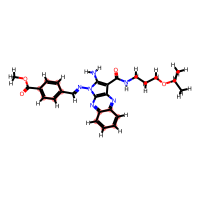
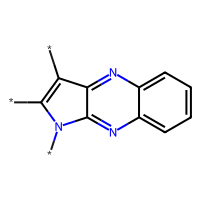
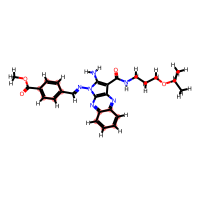
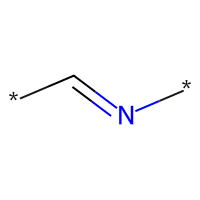
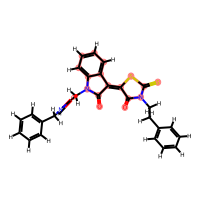
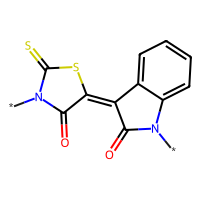
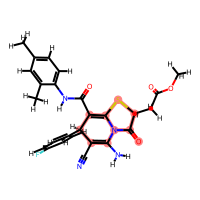
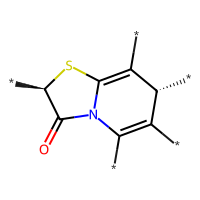
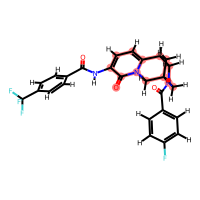
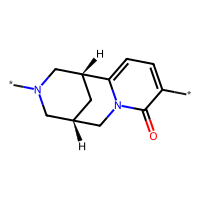
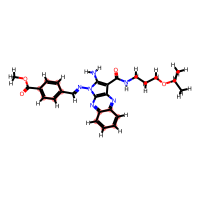
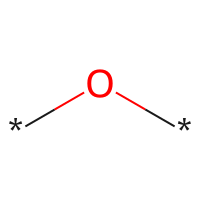
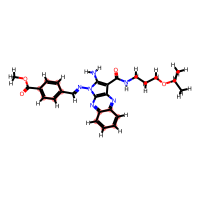
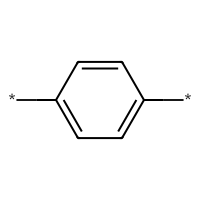
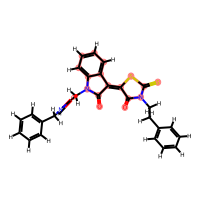
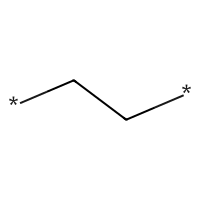
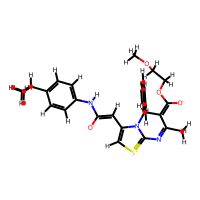
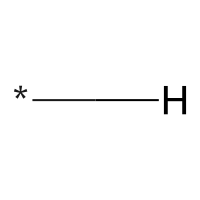
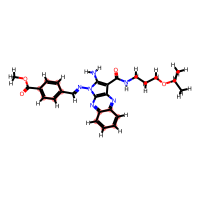
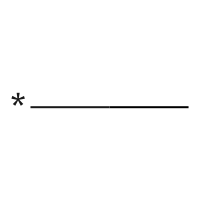

In [26]:
%time ff.count_groups_in_set(xyz_files,input_type='xyzfile',cml_list=cml_files,bb_patt='[$([C;X4;!R]):1]-[$([R,!$([C;X4]);!#0;!#9;!#17;!#35;!#1]):2]')

In [2]:
x1 = 'Data/DUDE_34879883_hivpr_decoys_C24H25F3N4O4S_CIR.xyz'
x2 = 'Data/DUDE_34922740_hivpr_decoys_C28H30N3O4S_CIR.xyz'
x3 = 'Data/DUDE_35454658_tryb1_decoys_C27H46O9_CIR.xyz'

mol_dict = utils.mol_from_xyzfile(xyz_file='Data/DUDE_63908281_vgfr2_decoys_C27H27N4O4S_CIR.xyz',cml_file='Data/DUDE_63908281_vgfr2_decoys_C27H27N4O4S_CIR.cml')
mol, atomic_symb, xyz_coords = mol_dict['Molecule'],  mol_dict['atomic_symbols'], mol_dict['xyz_pos']
atom_types = utils.get_cml_atom_types('Data/DUDE_63908281_vgfr2_decoys_C27H27N4O4S_CIR.cml')

[16:10:46] Running LargestFragmentChooser
[16:10:46] Fragment: [C:1]([C@@:2]1([H:3])[C:4]([H:43])([H:44])[C:5]([C:21](=[O:22])[C:23](/[S+:24]=[C:25]2\[N:26]=[N:27]/[C:28](=[C:30]3\[c:31]4[c:32]([H:58])[c:33]([H:59])[c:34]([H:60])[c:35]([H:61])[c:36]4[N:37]([H:38])[C:39]3([H:62])[H:63])[O:29]2)([H:56])[H:57])=[C:6]([C:20]([H:53])([H:54])[H:55])[N:7]1[C:8]([C@:9]1([H:10])[C:11]([H:47])([H:48])[O:12][c:13]2[c:14]([H:49])[c:15]([H:50])[c:16]([H:51])[c:17]([H:52])[c:18]2[O:19]1)([H:45])[H:46])([H:40])([H:41])[H:42]
[16:10:46] New largest fragment: [C:1]([C@@:2]1([H:3])[C:4]([H:43])([H:44])[C:5]([C:21](=[O:22])[C:23](/[S+:24]=[C:25]2\[N:26]=[N:27]/[C:28](=[C:30]3\[c:31]4[c:32]([H:58])[c:33]([H:59])[c:34]([H:60])[c:35]([H:61])[c:36]4[N:37]([H:38])[C:39]3([H:62])[H:63])[O:29]2)([H:56])[H:57])=[C:6]([C:20]([H:53])([H:54])[H:55])[N:7]1[C:8]([C@:9]1([H:10])[C:11]([H:47])([H:48])[O:12][c:13]2[c:14]([H:49])[c:15]([H:50])[c:16]([H:51])[c:17]([H:52])[c:18]2[O:19]1)([H:45])[H:46])([H:40])([H:41])[H:42

,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,atom_types
0,[1*]C,,1,"[1, 40, 41, 42]","[[-3.13771, 4.11255, 0.59528], [-2.58459, 4.75...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
1,[4*]C[5*],,2,"[8, 45, 46]","[[-5.36676, 1.81912, 1.01071], [-5.69302, 1.40...","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]"
2,[1*]C([2*])=O,,2,"[21, 22]","[[-0.6874, 0.2917, 1.60618], [-0.66829, -0.511...","[C, O]","[(C, 30, 3), (O, 4, 1)]"
3,[1*]C[6*],,2,"[23, 56, 57]","[[0.62961, 0.55519, 0.87335], [0.54329, 0.3424...","[C, H, H]","[(C, 65, 4), (H, 4, 1), (H, 4, 1)]"
4,[1*][C@H]1CC([2*])=C([3*])N1[4*],,4,"[2, 4, 5, 6, 7, 3, 43, 44]","[[-3.18031, 2.68714, 0.04743], [-1.78303, 2.03...","[C, C, C, C, N, H, H, H]","[(C, 39, 4), (C, 25, 4), (C, 24, 3), (C, 27, 3..."
5,[6*]/[S+]=C1\N=N/C(=C2/CNc3ccccc32)O1,,1,"[24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 3...","[[1.87823, -0.54353, 1.62161], [3.23191, -0.08...","[S, C, N, N, C, C, C, C, C, C, C, C, N, C, O, ...","[(S, 12, 2), (C, 59, 3), (N, 14, 2), (N, 14, 2..."
6,[3*]C,,1,"[20, 53, 54, 55]","[[-3.63508, 0.01731, 2.6405], [-2.84347, -0.58...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
7,[5*][C@@H]1COc2ccccc2O1,,1,"[9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 47...","[[-6.04323, 1.06037, -0.12551], [-7.55975, 1.1...","[C, C, O, C, C, C, C, C, C, O, H, H, H, H, H, ...","[(C, 43, 4), (C, 33, 4), (O, 12, 2), (C, 30, 3..."

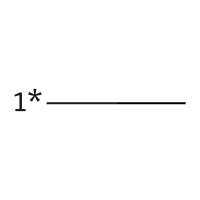
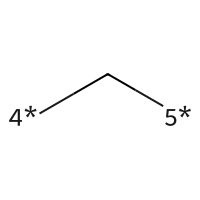
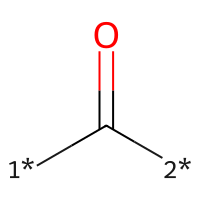
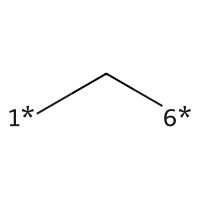
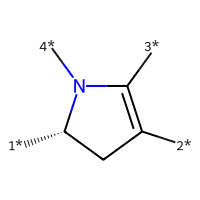
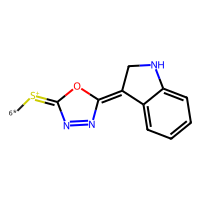
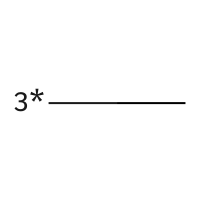
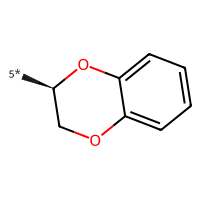

In [10]:
ff.identify_connected_fragments('Data/DUDE_63908281_vgfr2_decoys_C27H27N4O4S_CIR.xyz',input_type='xyzfile',cml_file='Data/DUDE_63908281_vgfr2_decoys_C27H27N4O4S_CIR.cml')

[15:50:09] Running LargestFragmentChooser
[15:50:09] Fragment: [C:1]([C@@:2]1([H:3])[C:4]([H:43])([H:44])[C:5]([C:21](=[O:22])[C:23](/[S+:24]=[C:25]2\[N:26]=[N:27]/[C:28](=[C:30]3\[c:31]4[c:32]([H:58])[c:33]([H:59])[c:34]([H:60])[c:35]([H:61])[c:36]4[N:37]([H:38])[C:39]3([H:62])[H:63])[O:29]2)([H:56])[H:57])=[C:6]([C:20]([H:53])([H:54])[H:55])[N:7]1[C:8]([C@:9]1([H:10])[C:11]([H:47])([H:48])[O:12][c:13]2[c:14]([H:49])[c:15]([H:50])[c:16]([H:51])[c:17]([H:52])[c:18]2[O:19]1)([H:45])[H:46])([H:40])([H:41])[H:42]
[15:50:09] New largest fragment: [C:1]([C@@:2]1([H:3])[C:4]([H:43])([H:44])[C:5]([C:21](=[O:22])[C:23](/[S+:24]=[C:25]2\[N:26]=[N:27]/[C:28](=[C:30]3\[c:31]4[c:32]([H:58])[c:33]([H:59])[c:34]([H:60])[c:35]([H:61])[c:36]4[N:37]([H:38])[C:39]3([H:62])[H:63])[O:29]2)([H:56])[H:57])=[C:6]([C:20]([H:53])([H:54])[H:55])[N:7]1[C:8]([C@:9]1([H:10])[C:11]([H:47])([H:48])[O:12][c:13]2[c:14]([H:49])[c:15]([H:50])[c:16]([H:51])[c:17]([H:52])[c:18]2[O:19]1)([H:45])[H:46])([H:40])([H:41])[H:42

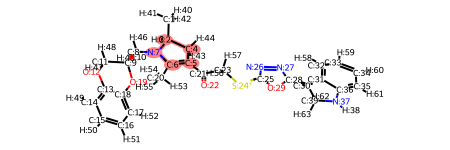

In [7]:
mol_frame = ff.generate_full_mol_frame(mol,xyz_coords)
mol_frame['molPart'].unique()
mol

[15:50:37] Running LargestFragmentChooser
[15:50:37] Fragment: [C:1]([C@@:2]1([H:3])[C:4]([H:43])([H:44])[C:5]([C:21](=[O:22])[C:23](/[S+:24]=[C:25]2\[N:26]=[N:27]/[C:28](=[C:30]3\[c:31]4[c:32]([H:58])[c:33]([H:59])[c:34]([H:60])[c:35]([H:61])[c:36]4[N:37]([H:38])[C:39]3([H:62])[H:63])[O:29]2)([H:56])[H:57])=[C:6]([C:20]([H:53])([H:54])[H:55])[N:7]1[C:8]([C@:9]1([H:10])[C:11]([H:47])([H:48])[O:12][c:13]2[c:14]([H:49])[c:15]([H:50])[c:16]([H:51])[c:17]([H:52])[c:18]2[O:19]1)([H:45])[H:46])([H:40])([H:41])[H:42]
[15:50:37] New largest fragment: [C:1]([C@@:2]1([H:3])[C:4]([H:43])([H:44])[C:5]([C:21](=[O:22])[C:23](/[S+:24]=[C:25]2\[N:26]=[N:27]/[C:28](=[C:30]3\[c:31]4[c:32]([H:58])[c:33]([H:59])[c:34]([H:60])[c:35]([H:61])[c:36]4[N:37]([H:38])[C:39]3([H:62])[H:63])[O:29]2)([H:56])[H:57])=[C:6]([C:20]([H:53])([H:54])[H:55])[N:7]1[C:8]([C@:9]1([H:10])[C:11]([H:47])([H:48])[O:12][c:13]2[c:14]([H:49])[c:15]([H:50])[c:16]([H:51])[c:17]([H:52])[c:18]2[O:19]1)([H:45])[H:46])([H:40])([H:41])[H:42

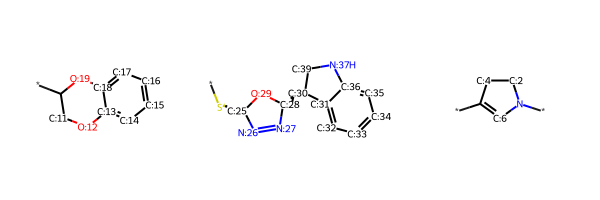

In [8]:
molnodemols = utils.get_scaffold_vertices(mol)
Draw.MolsToGridImage(molnodemols)
ring_frags = utils.find_smallest_rings(molnodemols)
Draw.MolsToGridImage(ring_frags)
# mol_frame = ff._initialize_molecule_frame(mol,xyz_coords)
# ring_atom_indices = ff._identify_ring_atom_index(mol,ring_frags)
# ring_indices_nosubset = ff._remove_subset_rings(ring_atom_indices)
# mol_frame = ff._assign_rings_to_mol_frame(ring_indices_nosubset,mol_frame)
# mol_frame[mol_frame['molPart']=='Ring 1']
# mol_frame = ff._set_hydrogens_in_ring(mol_frame,mol)
# ff._assign_side_and_linkers(mol_frame,mol)
# molecule = mol
# ring_assign = ff._find_in_ring_and_not(molecule)
# in_ring_py = ring_assign['in_ring']
# in_ring = in_ring_py.tolist()
# check_atoms = ring_assign['not_in_ring']
# not_in_ring = check_atoms.tolist()
# ff._find_group(check_atoms,molecule,not_in_ring,in_ring_py)

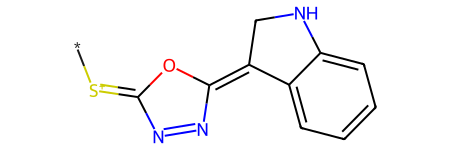

In [9]:
ff._clear_map_number(ring_frags[1],ret_type='mol')

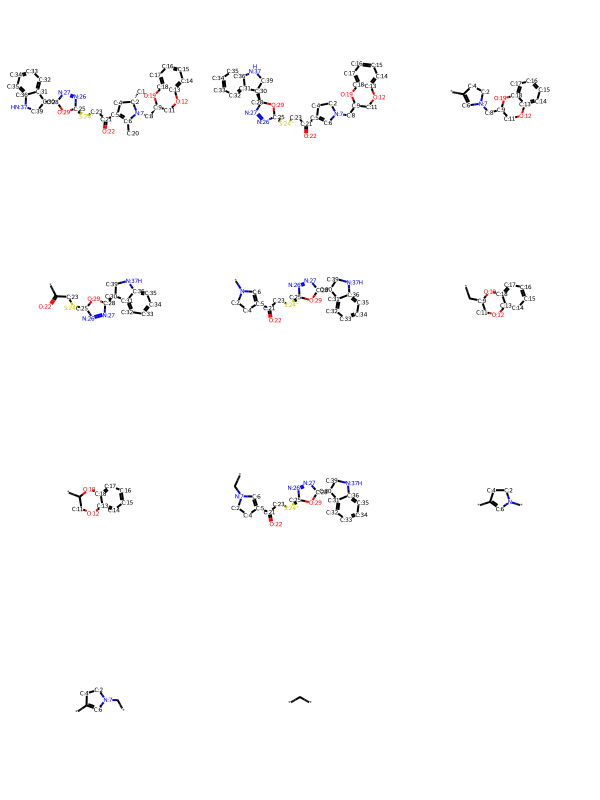

In [40]:
Draw.MolsToGridImage(molnodemols)

In [45]:
sum([x.IsInRing() for x in mol.GetAtoms()])

29

[14:51:34] Running LargestFragmentChooser
[14:51:34] Fragment: CC1=C(C(=O)C/[S+]=C2\N=N/C(=C3/CNc4ccccc43)O2)C[C@H](C)N1C[C@@H]1COc2ccccc2O1
[14:51:34] New largest fragment: CC1=C(C(=O)C/[S+]=C2\N=N/C(=C3/CNc4ccccc43)O2)C[C@H](C)N1C[C@@H]1COc2ccccc2O1 (63)


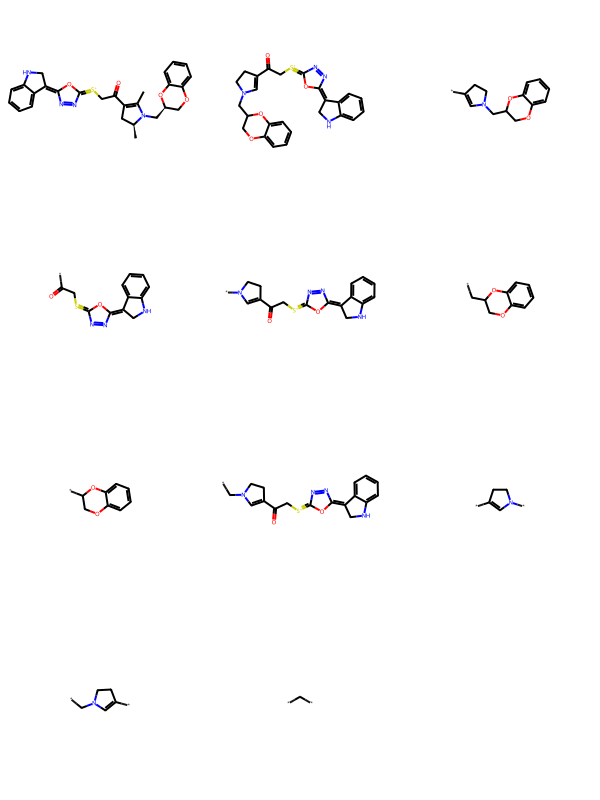

In [68]:
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
scafnet_params = rdScaffoldNetwork.ScaffoldNetworkParams()
#maintain attachments in scaffolds
scafnet_params.includeScaffoldsWithoutAttachments = False
#don't include scaffolds without atom labels
scafnet_params.includeGenericScaffolds = False
#keep all generated fragments - some were discarded messing with code if True
scafnet_params.keepOnlyFirstFragment = False
att_mol = ff._clear_map_number(att_mol,ret_type='mol')
net = rdScaffoldNetwork.CreateScaffoldNetwork([att_mol],scafnet_params)
node_molecules = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(node_molecules)
# import inspect
# attributes=[a for a in inspect.getmembers(scafnet_params) if not(a[0].startswith('__'))]
# print('params default attributes꞉')
# for a in attributes:
#   print('{0}꞉ {1}'.format(a[0],a[1]))

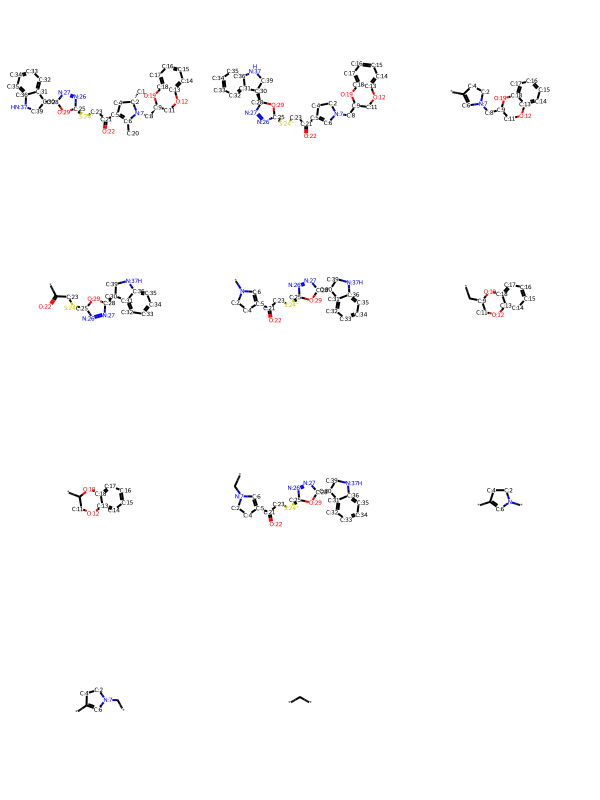

In [57]:
node_molecules = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(node_molecules)

In [63]:
mol.GetRingInfo().NumRings()

6

In [65]:
att_mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))

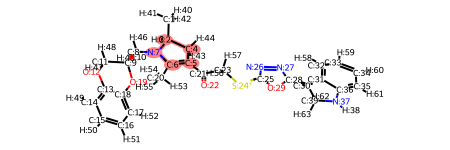

In [69]:
mol

In [77]:
patt = Chem.MolFromSmarts('[$([!#0;!R]=[!#0;R]):1]-[!#0;!R:2]≫[*:1]-[#0].[#0]-[*:2]')


In [78]:
mol.GetSubstructMatch(patt)

(23, 22)

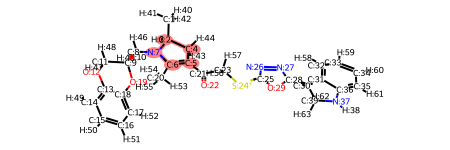

In [75]:
mol

In [22]:
t_line = '<bond atomRefs2="a1 a2" id="a1_a2" order="S"/>'.split()
t_line[4].split('"')[1]

'S'

In [17]:
t_line

['<bond', 'atomRefs2="a1', 'a2"', 'id="a1_a2"', 'order="S"/>']

In [25]:
('a','b','c')[0]

'a'

In [27]:
'<atom id="a20" elementType="C" x3="-3.6350756732" y3="0.0173059463" z3="2.6405023313"/>'.split('"')

['<atom id=',
 'a20',
 ' elementType=',
 'C',
 ' x3=',
 '-3.6350756732',
 ' y3=',
 '0.0173059463',
 ' z3=',
 '2.6405023313',
 '/>']

In [29]:
m = Chem.MolFromSmiles('C')

In [30]:
rm = Chem.RWMol(m)

In [36]:
rm.AddAtom(Chem.Atom('C'))

5

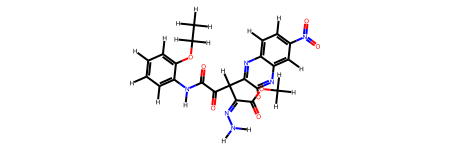

In [3]:
mol = utils.mol_from_cml('DUDE_16958170_hivpr_decoys_C22H19N6O8_CIR.cml')
mol.UpdatePropertyCache()
Chem.GetSymmSSSR(mol)
mol

In [ ]:
mol.UpdatePropertyCache()

In [5]: Chem.GetSymmSSSR(q2)
Out[5]: <rdkit.rdBase._vectSt6vectorIiSaIiEE at 0x7f237ac03db0>

In [6]: q2.GetRingInfo().NumRings()

In [38]:
'[H]c1c([H])c([H])c(N([H])C(=O)C(=O)C([H])(C(=NN([H])[H])C(=O)OC([H])([H])[H])C2=Nc3c([H])c([H])c(-n(o)o)c([H])c3nc2o)c(OC([H])([H])C([H])([H])[H])c1[H]'

SyntaxError: invalid syntax (3174174063.py, line 2)

In [7]:
Chem.MolFromSmiles('C=O').GetAtomWithIdx(1).GetTotalValence()

2